In [67]:
import numpy as np
import matplotlib.pyplot as plt
from pykin.utils import plot_utils as p_utils
from pytamp.benchmark import Benchmark1
from pytamp.action.place import PlaceAction
%matplotlib inline

*********************** Logical States ***********************
OrderedDict([('A_box',
              {'on': Object(name=table, pos=[ 1.1  -0.4  -0.03])}),
             ('B_box',
              {'on': Object(name=table, pos=[ 1.1  -0.4  -0.03])}),
             ('C_box',
              {'on': Object(name=table, pos=[ 1.1  -0.4  -0.03])}),
             ('D_box',
              {'on': Object(name=table, pos=[ 1.1  -0.4  -0.03]),
               'support': [Object(name=E_box, pos=[0.7        0.         0.82529998])]}),
             ('E_box',
              {'on': Object(name=D_box, pos=[0.7        0.         0.76529998]),
               'support': [Object(name=F_box, pos=[0.7        0.         0.88529998])]}),
             ('F_box',
              {'on': Object(name=E_box, pos=[0.7        0.         0.82529998])}),
             ('ceiling', {'static': True}),
             ('tray_red', {'static': True}),
             ('table',
              {'static': True,
               'support': [Object(name=A_b

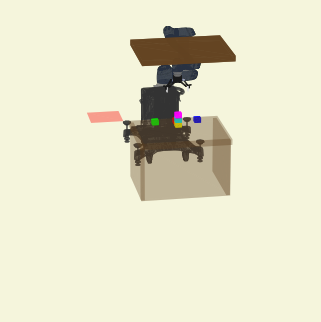

In [68]:
benchmark1 = Benchmark1(robot_name="doosan", geom="visual", is_pyplot=True, box_num=6)
place = PlaceAction(benchmark1.scene_mngr, n_samples_held_obj=0, n_samples_support_obj=0)
fig, ax = p_utils.init_3d_figure(name="Benchmark 1", figsize=[6,4])

benchmark1.scene_mngr.render_scene(ax)
benchmark1.scene_mngr.show()

In [69]:
def linearplot_with_confidence(x_list, mean_list, std_list, label, marker="", color='r'):
    a = 0.1
    plt.fill_between(x_list, mean_list-a*std_list,mean_list+a*std_list, alpha=0.13, color=color)
    plt.plot(x_list,mean_list,label=label,marker=marker, ms=11, c=color, markevery=15)

In [70]:
def get_final_all_values(algo, budgets, n_seed, end_num=0):
    result_all_values = {}
    
    perturb_final_level_1_values = []
    perturb_final_level_2_values = []
    perturb_final_pnp_all_joint_paths = []
    perturb_final_pick_all_objects = []
    perturb_final_place_all_object_poses = []
    for seed in range(1, n_seed+1):
        filename = f'benchmark1_result/benchmark1_test_algo({algo})_budget({budgets})_seed({seed})_{end_num}.npy'
        with open(filename,'rb') as f:
            data_for_seed = np.load(f, allow_pickle=True)
            perturb_final_level_1_values.append(data_for_seed['level_1_values'])
            perturb_final_level_2_values.append(data_for_seed['level_2_values'])
            perturb_final_pnp_all_joint_paths.append(data_for_seed['pnp_all_joint_paths'])
            perturb_final_pick_all_objects.append(data_for_seed['pick_all_objects'])
            perturb_final_place_all_object_poses.append(data_for_seed['place_all_object_poses'])
    
    perturb_final_level_1_values = np.asarray(perturb_final_level_1_values)
    perturb_final_level_2_values = np.asarray(perturb_final_level_2_values)
    perturb_final_level_2_values[np.isinf(perturb_final_level_2_values)]=0.
    
    result_all_values["level_1_values"] = perturb_final_level_1_values
    result_all_values["level_2_values"] = perturb_final_level_2_values
    result_all_values["pnp_all_joint_paths"] = perturb_final_pnp_all_joint_paths
    result_all_values["pick_all_objects"] = perturb_final_pick_all_objects
    result_all_values["place_all_object_poses"] = perturb_final_place_all_object_poses

    return result_all_values 

In [71]:
def plot_values(values, label=None, title="test"):
    _, ax = p_utils.init_2d_figure(title)
    for idx, value in enumerate(values):
        p_utils.plot_values(
            ax,
            value,
            label=str(idx),
            title=title)

In [72]:
def get_mean_std_values(result_all_values, level=1):
    if level == 1:
        key_name = "level_1_values"
    if level == 2:
        key_name = "level_2_values"
    mean_values = np.mean(result_all_values[key_name], axis=0)
    std_values = np.std(result_all_values[key_name], axis=0)
    return mean_values, std_values

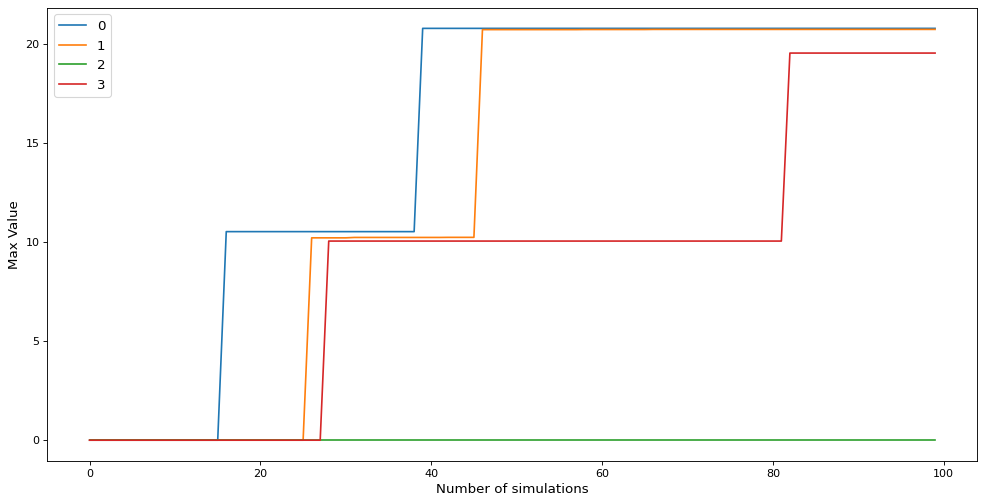

In [73]:
bai_perturb_result_all_values = get_final_all_values("bai_perturb", 100, 3, 0)
perturb_mean_level_1_values, perturb_std_level_1_values = get_mean_std_values(bai_perturb_result_all_values, level=1)
perturb_mean_level_2_values, perturb_std_level_2_values = get_mean_std_values(bai_perturb_result_all_values, level=2)
plot_values(perturb_mean_level_2_values)

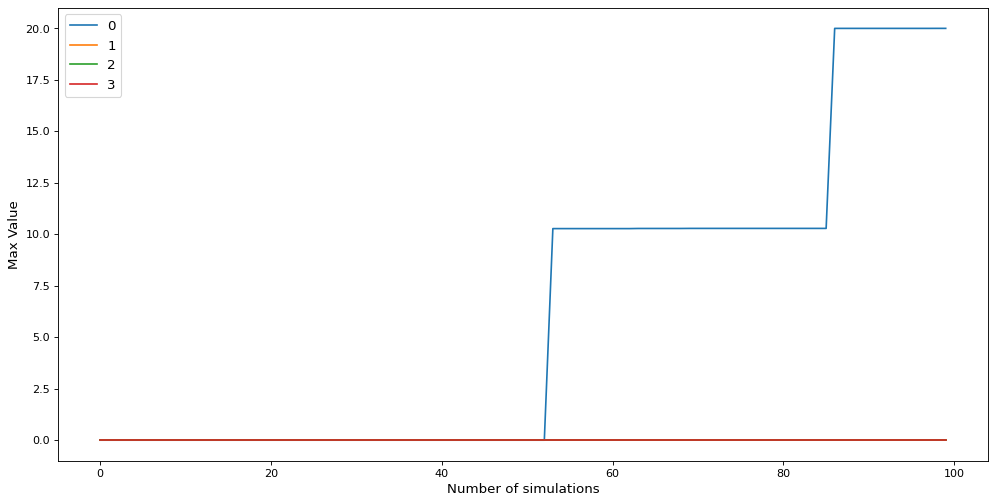

In [74]:
uct_result_all_values = get_final_all_values("uct", 100, 3, 0)
uct_mean_level_1_values, uct_std_level_1_values = get_mean_std_values(uct_result_all_values, level=1)
uct_mean_level_2_values, uct_std_level_2_values = get_mean_std_values(uct_result_all_values, level=2)
plot_values(uct_mean_level_2_values)

[[[ 0.        0.        0.       ... 31.585271 31.585271 31.585271]
  [ 0.        0.        0.       ... 30.735338 30.735338 30.735338]
  [ 0.        0.        0.       ...  0.        0.        0.      ]
  [ 0.        0.        0.       ...  0.        0.        0.      ]]

 [[ 0.        0.        0.       ... 30.783216 30.783216 30.783216]
  [ 0.        0.        0.       ...  0.        0.        0.      ]
  [ 0.        0.        0.       ...  0.        0.        0.      ]
  [ 0.        0.        0.       ... 30.156538 30.156538 30.156538]]

 [[ 0.        0.        0.       ...  0.        0.        0.      ]
  [ 0.        0.        0.       ... 31.477171 31.477171 31.477171]
  [ 0.        0.        0.       ...  0.        0.        0.      ]
  [ 0.        0.        0.       ... 28.471671 28.471671 28.471671]]]
[[[ 0.        0.        0.       ...  0.        0.        0.      ]
  [ 0.        0.        0.       ... 31.472771 31.472771 31.472771]
  [ 0.        0.        0.       ... 30.78

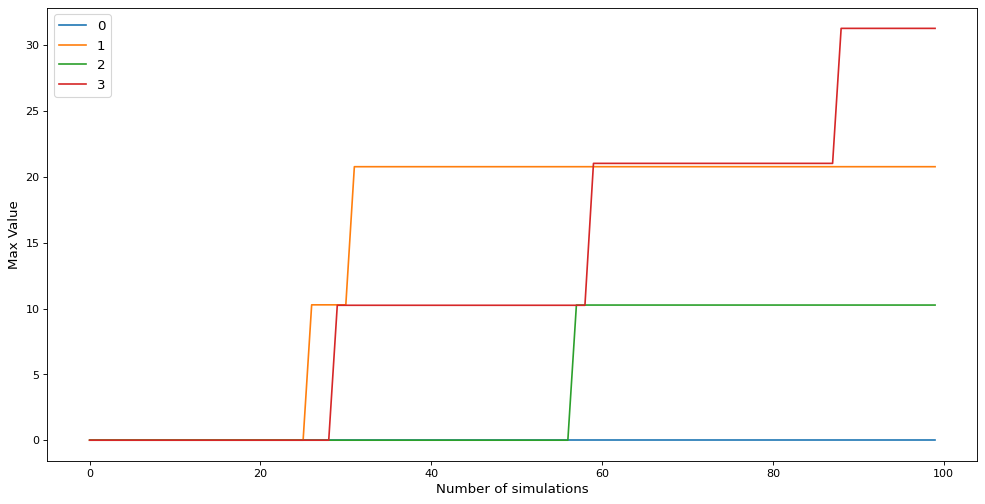

In [75]:
random_result_all_values = get_final_all_values("random", 100, 3, 0)

print(bai_perturb_result_all_values["level_2_values"])
print(random_result_all_values["level_2_values"])
random_mean_level_1_values, random_std_level_1_values = get_mean_std_values(random_result_all_values, level=1)
random_mean_level_2_values, random_std_level_2_values = get_mean_std_values(random_result_all_values, level=2)
plot_values(random_mean_level_2_values)

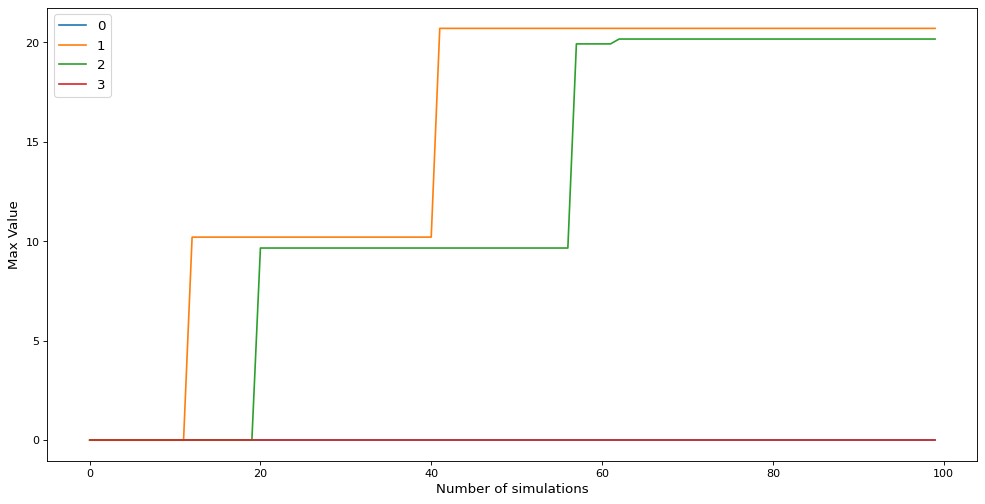

In [76]:
bai_ucb_result_all_values = get_final_all_values("bai_ucb", 100, 3, 0)
bai_ucb_mean_level_1_values, bai_ucb_std_level_1_values = get_mean_std_values(bai_ucb_result_all_values, level=1)
bai_ucb_mean_level_2_values, bai_ucb_std_level_2_values = get_mean_std_values(bai_ucb_result_all_values, level=2)
plot_values(bai_ucb_mean_level_2_values)

3


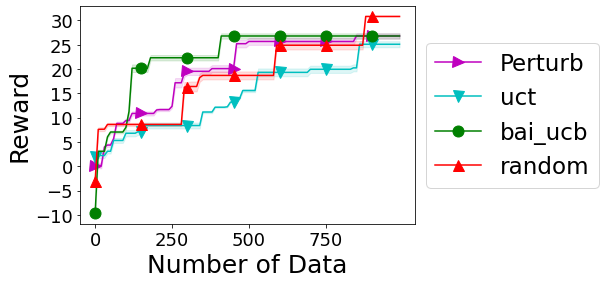

In [77]:
max_perturb_idx = np.argmax(perturb_mean_level_1_values[:, -1])
perturb_level_1_mean_list = perturb_mean_level_1_values[max_perturb_idx]
perturb_level_1_std_list = perturb_std_level_1_values[max_perturb_idx]

max_uct_idx = np.argmax(uct_mean_level_1_values[:, -1])
uct_level_1_mean_list = uct_mean_level_1_values[max_uct_idx]
uct_level_1_std_list = uct_std_level_1_values[max_uct_idx]

max_bai_ucb_idx = np.argmax(bai_ucb_mean_level_1_values[:, -1])
bai_ucb_level_1_mean_list = bai_ucb_mean_level_1_values[max_bai_ucb_idx]
bai_ucb_level_1_std_list = bai_ucb_std_level_1_values[max_bai_ucb_idx]

max_random_idx = np.argmax(random_mean_level_1_values[:, -1])
print(max_random_idx)
random_level_1_mean_list = random_mean_level_1_values[max_random_idx]
random_level_1_std_list = random_std_level_1_values[max_random_idx]

x_list = 10*np.arange(len(perturb_level_1_mean_list))

linearplot_with_confidence(x_list, perturb_level_1_mean_list, perturb_level_1_std_list, "Perturb", ">", "m")
linearplot_with_confidence(x_list, uct_level_1_mean_list, uct_level_1_std_list, "uct", "v", "c")
linearplot_with_confidence(x_list, bai_ucb_level_1_mean_list, bai_ucb_level_1_std_list, "bai_ucb", "o", "g")
linearplot_with_confidence(x_list, random_level_1_mean_list, random_level_1_std_list, "random", "^", "r")

plt.xlabel("Number of Data",fontsize=25)
plt.ylabel("Reward",fontsize=25)

plt.xticks(x_list[::25],x_list[::25],fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 23})
plt.show()

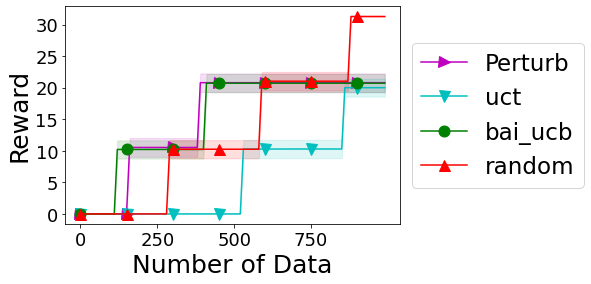

In [78]:
max_perturb_idx = np.argmax(perturb_mean_level_2_values[:, -1])
perturb_level_2_mean_list = perturb_mean_level_2_values[max_perturb_idx]
perturb_level_2_std_list = perturb_std_level_2_values[max_perturb_idx]

max_uct_idx = np.argmax(uct_mean_level_2_values[:, -1])
uct_level_2_mean_list = uct_mean_level_2_values[max_uct_idx]
uct_level_2_std_list = uct_std_level_2_values[max_uct_idx]

max_bai_ucb_idx = np.argmax(bai_ucb_mean_level_2_values[:, -1])
bai_ucb_level_2_mean_list = bai_ucb_mean_level_2_values[max_bai_ucb_idx]
bai_ucb_level_2_std_list = bai_ucb_std_level_2_values[max_bai_ucb_idx]

max_random_idx = np.argmax(random_mean_level_2_values[:, -1])
random_level_2_mean_list = random_mean_level_2_values[max_random_idx]
random_level_2_std_list = random_std_level_2_values[max_random_idx]

x_list = 10*np.arange(len(perturb_level_2_mean_list))

linearplot_with_confidence(x_list, perturb_level_2_mean_list, perturb_level_2_std_list, "Perturb", ">", "m")
linearplot_with_confidence(x_list, uct_level_2_mean_list, uct_level_2_std_list, "uct", "v", "c")
linearplot_with_confidence(x_list, bai_ucb_level_2_mean_list, bai_ucb_level_2_std_list, "bai_ucb", "o", "g")
linearplot_with_confidence(x_list, random_level_2_mean_list, random_level_2_std_list, "random", "^", "r")

plt.xlabel("Number of Data",fontsize=25)
plt.ylabel("Reward",fontsize=25)

plt.xticks(x_list[::25],x_list[::25],fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 23})
plt.show()

In [79]:
bai_perturb_idx = np.unravel_index(bai_perturb_result_all_values['level_2_values'].argmax(), bai_perturb_result_all_values['level_2_values'].shape)
pnp_all_joint_path = bai_perturb_result_all_values['pnp_all_joint_paths'][bai_perturb_idx[0]][bai_perturb_idx[1]]
pick_all_objects = bai_perturb_result_all_values['pick_all_objects'][bai_perturb_idx[0]][bai_perturb_idx[1]]
place_all_object_poses = bai_perturb_result_all_values['place_all_object_poses'][bai_perturb_idx[0]][bai_perturb_idx[1]]

uct_idx = np.unravel_index(uct_result_all_values['level_2_values'].argmax(), uct_result_all_values['level_2_values'].shape)
pnp_all_joint_path = uct_result_all_values['pnp_all_joint_paths'][uct_idx[0]][uct_idx[1]]
pick_all_objects = uct_result_all_values['pick_all_objects'][uct_idx[0]][uct_idx[1]]
place_all_object_poses = uct_result_all_values['place_all_object_poses'][uct_idx[0]][uct_idx[1]]

bai_ucb_idx = np.unravel_index(bai_ucb_result_all_values['level_2_values'].argmax(), bai_ucb_result_all_values['level_2_values'].shape)
pnp_all_joint_path = bai_ucb_result_all_values['pnp_all_joint_paths'][bai_ucb_idx[0]][bai_ucb_idx[1]]
pick_all_objects = bai_ucb_result_all_values['pick_all_objects'][bai_ucb_idx[0]][bai_ucb_idx[1]]
place_all_object_poses = bai_ucb_result_all_values['place_all_object_poses'][bai_ucb_idx[0]][bai_ucb_idx[1]]

random_idx = np.unravel_index(random_result_all_values['level_2_values'].argmax(), random_result_all_values['level_2_values'].shape)
pnp_all_joint_path = random_result_all_values['pnp_all_joint_paths'][random_idx[0]][random_idx[1]]
pick_all_objects = random_result_all_values['pick_all_objects'][random_idx[0]][random_idx[1]]
place_all_object_poses = random_result_all_values['place_all_object_poses'][random_idx[0]][random_idx[1]]

In [80]:
#place.simulate_path(pnp_all_joint_path, pick_all_objects, place_all_object_poses)

In [81]:
print(bai_perturb_result_all_values["level_1_values"][bai_perturb_idx])
print(uct_result_all_values["level_1_values"][uct_idx])
print(bai_ucb_result_all_values["level_1_values"][bai_ucb_idx])
print(random_result_all_values["level_1_values"][random_idx])

31.07857142857143
30.323015873015876
31.07857142857143
31.07857142857143


In [82]:
print(bai_perturb_result_all_values["level_2_values"][bai_perturb_idx])
print(uct_result_all_values["level_2_values"][uct_idx])
print(bai_ucb_result_all_values["level_2_values"][bai_ucb_idx])
print(random_result_all_values["level_2_values"][random_idx])

31.585271
30.849916
31.525671
31.574971
